In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display='diagram')

In [2]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


<AxesSubplot:>

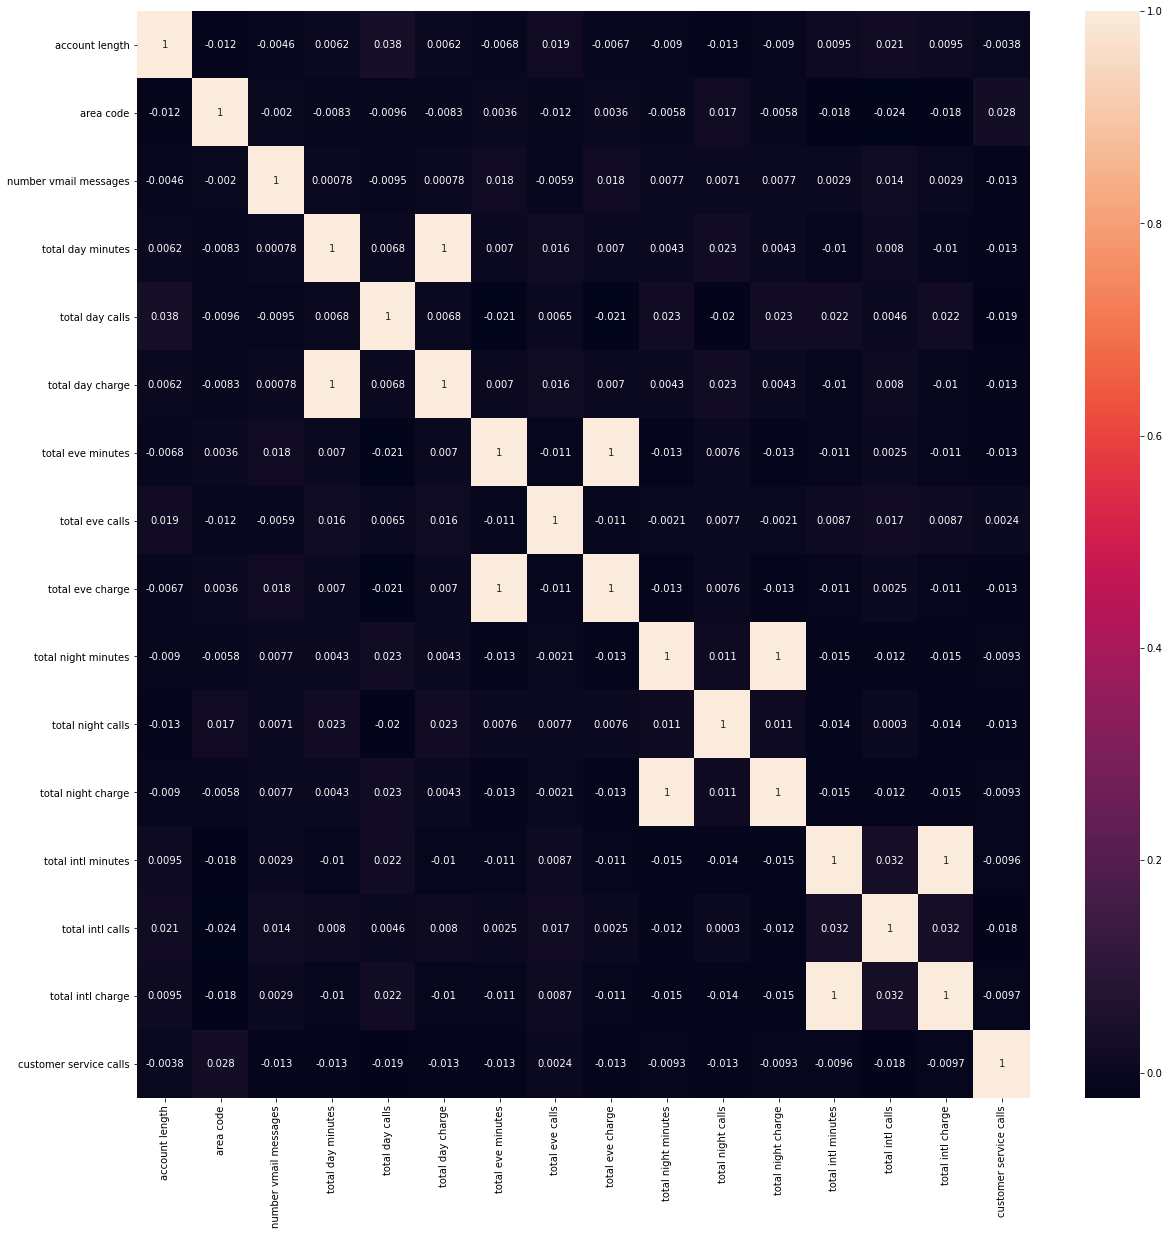

In [5]:
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.drop(columns = ['state','phone number', 'international plan', 'voice mail plan', 'churn']).corr(), annot = True)

In [6]:
df.drop(columns = ['phone number', 'total day charge', 'total eve charge','total night charge', 'total intl charge'], inplace = True)

In [7]:
le = LabelEncoder()
le.fit(df['churn'])
df['churn'] = le.transform(df['churn'])

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [9]:
X = df.drop(columns = "churn", axis = 1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 24)

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

nominal_pipeline = Pipeline([('one_hot', OneHotEncoder()), ('mm_scaler', MaxAbsScaler())])
numeric_pipeline = Pipeline([(('std_scaler'), StandardScaler())])

num_cols = X_train.select_dtypes(['int', 'float']).columns

ct = ColumnTransformer([('nominalpipe', nominal_pipeline, ['state', 'area code', 'international plan', 'voice mail plan']), 
                        ('numpipe', numeric_pipeline, num_cols)])


pipe = Pipeline([('preprocessing', ct), ('model', LogisticRegression(random_state = 24))])


In [11]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder()),
                                                                  ('mm_scaler',
                                                                   MaxAbsScaler())]),
                                                  ['state', 'area code',
                                                   'international plan',
                                                   'voice mail plan']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['total day minutes', 'total eve minutes', 'total night minutes',
       'total intl minutes'],
      dtype='object'))])),
                ('model', LogisticRegression(random_state=24))])

In [12]:
y_pred_fsm = pipe.predict(X_train)
print(classification_report(y_train, y_pred_fsm))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2283
           1       0.67      0.17      0.27       383

    accuracy                           0.87      2666
   macro avg       0.78      0.58      0.60      2666
weighted avg       0.85      0.87      0.83      2666



In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler

smote = SMOTE(random_state = 24)
ros = RandomOverSampler(random_state = 24)

nominal_pipeline = Pipeline([('one_hot', OneHotEncoder()), ('maxab_scaler', MaxAbsScaler())])
numeric_pipeline = Pipeline([(('std_scaler'), StandardScaler())])

num_cols = X_train.select_dtypes(['int', 'float']).columns

ct = ColumnTransformer([('nominalpipe', nominal_pipeline, ['state', 'area code','international plan', 'voice mail plan']), 
                        ('numpipe', numeric_pipeline, num_cols)])


pipe = Pipeline([('preprocessing', ct), ('sampling', ros), ('model', LogisticRegression(random_state = 24, max_iter = 10*100))])


In [14]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder()),
                                                                  ('maxab_scaler',
                                                                   MaxAbsScaler())]),
                                                  ['state', 'area code',
                                                   'international plan',
                                                   'voice mail plan']),
                                                 ('numpipe',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['total day minutes', 'total eve minutes', 'total night minutes',
       'total intl minutes'],
      dtype='object'))])),
                ('sampling', RandomOverSampler(random_state=24)),
                ('model', LogisticRegression(max_iter=1000, random_state=24))])

In [15]:
fsm_smote = pipe.predict(X_train)
print(classification_report(y_train, fsm_smote))

              precision    recall  f1-score   support

           0       0.93      0.74      0.83      2283
           1       0.31      0.68      0.42       383

    accuracy                           0.73      2666
   macro avg       0.62      0.71      0.62      2666
weighted avg       0.84      0.73      0.77      2666



In [16]:
grid = [{'model__C': [.001, .01, 1, 10, 100],
         'sampling__sampling_strategy': [ .5, .7, 1]}
       ]

In [17]:
gridsearch = GridSearchCV(pipe, grid, scoring = 'recall', cv = 4)

In [18]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('nominalpipe',
                                                                         Pipeline(steps=[('one_hot',
                                                                                          OneHotEncoder()),
                                                                                         ('maxab_scaler',
                                                                                          MaxAbsScaler())]),
                                                                         ['state',
                                                                          'area '
                                                                          'code',
                                                                          'international '
                                                                          'plan',
                                                                          'voice '
                                                                          'mail '
                                                                          'plan']),
                                                                        ('numpipe',
                                                                         Pipeline(steps=[('std_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['total day minutes', 'total eve minutes', 'total night minutes',
       'total intl minutes'],
      dtype='object'))])),
                                       ('sampling',
                                        RandomOverSampler(random_state=24)),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=24))]),
             param_grid=[{'model__C': [0.001, 0.01, 1, 10, 100],
                          'sampling__sampling_strategy': [0.5, 0.7, 1]}],
             scoring='recall')

In [19]:
gridsearch.best_params_

{'model__C': 0.01, 'sampling__sampling_strategy': 1}

In [20]:
best_model_log = gridsearch.best_estimator_

In [21]:
fsm_smote_tune = best_model_log.predict(X_train)

In [22]:
print(classification_report(y_train, fsm_smote_tune))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      2283
           1       0.30      0.67      0.42       383

    accuracy                           0.73      2666
   macro avg       0.62      0.71      0.62      2666
weighted avg       0.84      0.73      0.77      2666



In [23]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
second_nominalpipe = Pipeline([('one_hot', OneHotEncoder())])

ctRF = ColumnTransformer([('secondnominalpipe', second_nominalpipe, ['state', 'area code', 'international plan', 'voice mail plan'])], remainder = 'passthrough')
                          
secondpipe = Pipeline([('preprocessing', ctRF), ('sampling', ros), ('model', RandomForestClassifier(random_state = 24))])

In [189]:
secondpipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('secondnominalpipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['state', 'area code',
                                                   'international plan',
                                                   'voice mail plan'])])),
                ('sampling', RandomOverSampler(random_state=24)),
                ('model', RandomForestClassifier(random_state=24))])

In [190]:
secondpipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('secondnominalpipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['state', 'area code',
                                                   'international plan',
                                                   'voice mail plan'])])),
                ('sampling', RandomOverSampler(random_state=24)),
                ('model', RandomForestClassifier(random_state=24))])

In [196]:
RF_predict = secondpipe.predict(X_train)
print(classification_report(y_train, RF_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00       383

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666



In [216]:
RFgrid = [{"model__criterion" : ["gini", "entropy"],
           "model__n_estimators": [10, 30, 60, 80, 100],
                "model__max_depth": [2,3,4,5,6,8,10, None],
                "model__min_samples_split": [2,5, 6, 10],
                "model__min_samples_leaf": [1,2,3,4,5,6, 10, 15],
         'sampling__sampling_strategy': [.7, 1]}
       ]

In [217]:
RFrandomsearch = RandomizedSearchCV(secondpipe, RFgrid, scoring = 'recall', cv = 4)

In [218]:
RFrandomsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('secondnominalpipe',
                                                                               Pipeline(steps=[('one_hot',
                                                                                                OneHotEncoder())]),
                                                                               ['state',
                                                                                'area '
                                                                                'code',
                                                                                'international '
                                                                                'plan',
                                                                                'voice '
                                                                                'mail '
                                                                                'plan'])])),
                                             ('sampling',
                                              RandomOverSampler(random_state=24)),
                                             ('model',
                                              RandomForestClassifier(random_state=24))]),
                   param_distributions=[{'model__criterion': ['gini',
                                                              'entropy'],
                                         'model__max_depth': [2, 3, 4, 5, 6, 8,
                                                              10, None],
                                         'model__min_samples_leaf': [1, 2, 3, 4,
                                                                     5, 6, 10,
                                                                     15],
                                         'model__min_samples_split': [2, 5, 6,
                                                                      10],
                                         'model__n_estimators': [10, 30, 60, 80,
                                                                 100],
                                         'sampling__sampling_strategy': [0.7,
                                                                         1]}],
                   scoring='recall')

In [219]:
randomRF_best_model = RFrandomsearch.best_estimator_

In [220]:
RFrandomsearch.best_params_

{'sampling__sampling_strategy': 1,
 'model__n_estimators': 80,
 'model__min_samples_split': 6,
 'model__min_samples_leaf': 6,
 'model__max_depth': 6,
 'model__criterion': 'gini'}

In [221]:
y_pred_RF = randomRF_best_model.predict(X_train)

In [222]:
print(classification_report(y_train, y_pred_RF))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2283
           1       0.54      0.85      0.66       383

    accuracy                           0.88      2666
   macro avg       0.76      0.87      0.79      2666
weighted avg       0.91      0.88      0.89      2666



In [223]:
print(classification_report(y_test, randomRF_best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       567
           1       0.52      0.87      0.65       100

    accuracy                           0.86       667
   macro avg       0.75      0.86      0.78       667
weighted avg       0.91      0.86      0.87       667



In [ ]:
secondpipe.named_steps['preprocessing'].transformers_[0][1].named_steps['one_hot'].get_feature_names()

In [ ]:
columns_names = ['x0_AK', 'x0_AL', 'x0_AR', 'x0_AZ', 'x0_CA', 'x0_CO', 'x0_CT',
'x0_DC', 'x0_DE', 'x0_FL', 'x0_GA', 'x0_HI', 'x0_IA', 'x0_ID',
'x0_IL', 'x0_IN', 'x0_KS', 'x0_KY', 'x0_LA', 'x0_MA', 'x0_MD',
'x0_ME', 'x0_MI', 'x0_MN', 'x0_MO', 'x0_MS', 'x0_MT', 'x0_NC',
'x0_ND', 'x0_NE', 'x0_NH', 'x0_NJ', 'x0_NM', 'x0_NV', 'x0_NY',
'x0_OH', 'x0_OK', 'x0_OR', 'x0_PA', 'x0_RI', 'x0_SC', 'x0_SD',
'x0_TN', 'x0_TX', 'x0_UT', 'x0_VA', 'x0_VT', 'x0_WA', 'x0_WI',
'x0_WV', 'x0_WY', 'account length', 'x1_408', 'x1_415', 'x1_510', 'x2_no', 'x2_yes',
'x3_no', 'x3_yes', 'number vmail messages', 'total day minutes', 'total day calls',
'total eve minutes', 'total eve calls', 'total night minutes', 'total night calls',
'total intl minutes', 'total intl calls', 'customer service calls']

<AxesSubplot:>

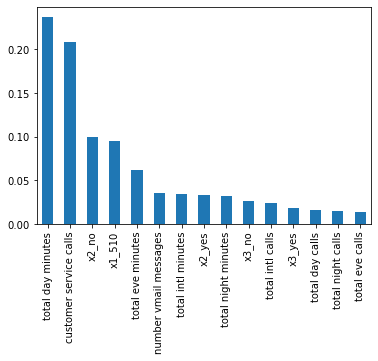

In [285]:
feature_imp = randomRF_best_model['model'].feature_importances_

feat_imp_series = pd.Series(feature_imp, index = columns_names).sort_values(ascending = False)
feat_imp_series.nlargest(15).plot(kind = 'bar')

In [229]:
#Results from random forest search

{'sampling__sampling_strategy': 1,
 'model__n_estimators': 100,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 10,
 'model__max_depth': 6,
 'model__criterion': 'gini'}
{'sampling__sampling_strategy': 1,
 'model__n_estimators': 100,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 15,
 'model__max_depth': 10,
 'model__criterion': 'entropy'}
{'sampling__sampling_strategy': 1,
 'model__n_estimators': 100,
 'model__min_samples_split': 5,
 'model__min_samples_leaf': 15,
 'model__max_depth': 5,
 'model__criterion': 'gini'}
{'sampling__sampling_strategy': 1,
 'model__n_estimators': 80,
 'model__min_samples_split': 10,
 'model__min_samples_leaf': 4,
 'model__max_depth': 10,
 'model__criterion': 'entropy'}
{'sampling__sampling_strategy': 1,
 'model__n_estimators': 80,
 'model__min_samples_split': 6,
 'model__min_samples_leaf': 6,
 'model__max_depth': 6,
 'model__criterion': 'gini'}

RandomForestClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=6,
                       n_estimators=80, random_state=24)

In [258]:
RFgrid_GS = {'sampling__sampling_strategy': [1],
 'model__n_estimators': [80, 100],
 'model__min_samples_split': [2,5,6,8,10],
 'model__min_samples_leaf': [4, 6, 10, 12],
 'model__max_depth': [5, 6, 8, 10],
 'model__criterion': ['gini', 'entropy']}
RFgridsearch = GridSearchCV(secondpipe, RFgrid_GS, scoring = 'recall', cv = 4)


In [269]:
RFgridsearch.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('secondnominalpipe',
                                                                         Pipeline(steps=[('one_hot',
                                                                                          OneHotEncoder())]),
                                                                         ['state',
                                                                          'area '
                                                                          'code',
                                                                          'international '
                                                                          'plan',
                                                                          'voice '
                                                                          'mail '
                                                                          'plan'])])),
                                       ('sampling',
                                        RandomOverSampler(random_state=24)),
                                       ('model',
                                        RandomForestClassifier(random_state=24))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [5, 6, 8, 10],
                         'model__min_samples_leaf': [4, 6, 10, 12],
                         'model__min_samples_split': [2, 5, 6, 8, 10],
                         'model__n_estimators': [80, 100],
                         'sampling__sampling_strategy': [1]},
             scoring='recall')

In [270]:
RFgridsearch.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 8,
 'model__min_samples_leaf': 10,
 'model__min_samples_split': 2,
 'model__n_estimators': 80,
 'sampling__sampling_strategy': 1}

In [277]:
RFgridsearch.best_score_

0.8331140350877192

In [278]:
best_model = RFgridsearch.best_estimator_

In [282]:
RFgridsearch.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('secondnominalpipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['state', 'area code',
                                                   'international plan',
                                                   'voice mail plan'])])),
                ('sampling',
                 RandomOverSampler(random_state=24, sampling_strategy=1)),
                ('model',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=10,
                                        n_estimators=80, random_state=24))])

In [279]:
best_model_pred = best_model.predict(X_train)

In [280]:
print(classification_report(y_train, best_model_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2283
           1       0.62      0.86      0.72       383

    accuracy                           0.90      2666
   macro avg       0.80      0.88      0.83      2666
weighted avg       0.92      0.90      0.91      2666



In [281]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93       567
           1       0.56      0.87      0.69       100

    accuracy                           0.88       667
   macro avg       0.77      0.88      0.81       667
weighted avg       0.91      0.88      0.89       667

